<a href="https://colab.research.google.com/github/Gui-Rigaud/hateful-speech-detection/blob/feat%2Feda%2Bfeature_extraction/Detec%C3%A7%C3%A3o_de_Fake_News_Projeto_CIN0144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Bibliotecas

In [36]:
%pip install transformers
%pip install seaborn

In [37]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno

sns.set_theme(style="whitegrid", palette="Set2", color_codes=True)

## Análise Exploratória dos Dados

In [38]:
from sklearn.model_selection import train_test_split

train_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/train.csv'
df_train = pd.read_csv(train_file_path)
y_train = df_train['label']
X_train = df_train['content']

test_file_path = 'https://raw.githubusercontent.com/EduardoCavValenca/Automatic-Detection-of-Fake-News-in-Portuguese/main/data/csvs/test.csv'
df_test = pd.read_csv(test_file_path)
y_test = df_test['label']
X_test = df_test['content']

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  5760 non-null   object 
 1   label    5760 non-null   int64  
 2   rating   5760 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.1+ KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   content          1440 non-null   object 
 1   label            1440 non-null   int64  
 2   rating           1440 non-null   float64
 3   predicted_label  1440 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 45.1+ KB


In [41]:
df_train.head()

,content,label,rating
0,﻿juiz determina soltura de 4 presos por pensão...,1,0.031619
1,"pivô do mensalão, jefferson não assistiu à tra...",1,0.033124
2,oficial da reserva avisa: se a lei do impeachm...,0,0.008723
3,bolsonaro vai para o psl e liberais abandonam ...,1,0.016806
4,"por maioria de votos, os ministros da 2.a tur...",1,0.021402


In [42]:
df_test.head()

,content,label,rating,predicted_label
0,começou a baderna! apoiadores de lula são pego...,0,0.000000,0
1,eike deixou o país com passaporte alemão e pod...,0,0.000000,0
2,delcídio dá entrevista e confirma quem são os ...,0,0.000000,0
3,urgente: mtst invade prédio oficial da presidê...,0,0.030483,0
4,"em 2009, barbosa alertou: gilmar mendes está d...",0,0.000000,0


In [43]:
print("Tamanho do conjunto de TREINO:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

print("Tamanho do conjunto de TESTE:")
print("Textos:", len(df_train))
print("Rótulos:", len(df_train))

Tamanho do conjunto de TREINO:
Textos: 5760
Rótulos: 5760
Tamanho do conjunto de TESTE:
Textos: 5760
Rótulos: 5760


In [44]:
# Conjunto de treino
print("\nValores Nulos:")
print("\nTreino")
print(df_train.isnull().sum())

# Conjunto de teste
print("\nTeste")
print(df_train.isnull().sum())


Valores Nulos:

Treino
content    0
label      0
rating     0
dtype: int64

Teste
content    0
label      0
rating     0
dtype: int64


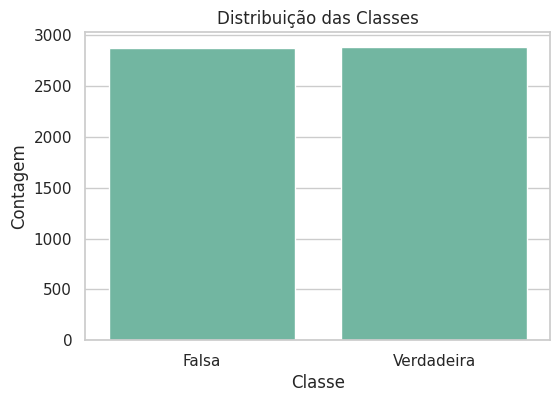

In [45]:
class_distribution = df_train['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

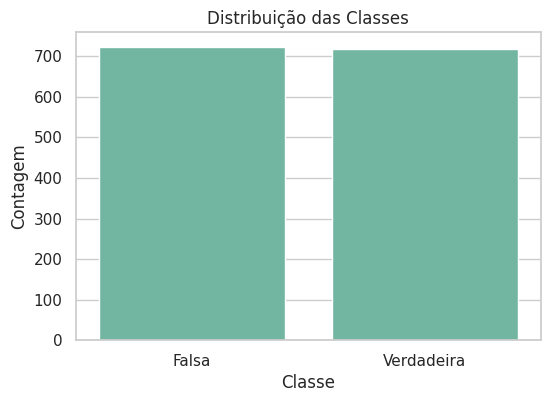

In [46]:
class_distribution = df_test['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Falsa', 'Verdadeira'])
plt.show()

In [47]:
print("Distribuição das classes no conjunto de dados de treino:")
print(df_train['label'].value_counts())
print("Distribuição das classes no conjunto de dados de teste:")
print(df_test['label'].value_counts())

Distribuição das classes no conjunto de dados de treino:
label
1    2883
0    2877
Name: count, dtype: int64
Distribuição das classes no conjunto de dados de teste:
label
0    723
1    717
Name: count, dtype: int64
